# Deeplab

In [7]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [8]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 8
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

In [9]:
model_name = 'deeplab'

In [10]:
data = None

In [11]:
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data, num_slice=num_slice, sz=sz)
(trn_x,trn_y), (val_x,val_y) = data


Data finished loading: data/train/AOI_2_Vegas_Train


In [12]:
learn.load('deeplab-vegas')
learn.unfreeze()

epoch      trn_loss   val_loss   mask_acc                      
    0      0.142515   0.105682   0.189166  
    1      0.133789   0.104909   0.189166                      
    2      0.14037    0.110872   0.189166                      
    3      0.13679    0.108478   0.189166                      
    4      0.134354   0.106377   0.189166                      
    5      0.134626   0.10501    0.189166                      
    6      0.135637   0.103705   0.189166                      
    7      0.13638    0.101566   0.189166                      
    8      0.137345   0.117743   0.189166                      
    9      0.138215   0.113387   0.189166                      
    10     0.13556    0.115017   0.189166                      
    11     0.133438   0.113555   0.189166                      
    12     0.131903   0.113798   0.189166                      
    13     0.139704   0.116099   0.189166                      
    14     0.134345   0.107742   0.189166                   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    19     0.135266   0.114829   0.189166                      
    20     0.134768   0.120849   0.189166                      
 39%|███▉      | 476/1213 [11:45<18:12,  1.48s/it, loss=0.131]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    22     0.137435   0.117406   0.189166                      
    23     0.134236   0.12283    0.189166                      
 54%|█████▍    | 658/1213 [15:46<13:18,  1.44s/it, loss=0.133]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    26     0.133767   0.126314   0.189166                      
    27     0.130044   0.125851   0.189166                      
 23%|██▎       | 283/1213 [06:49<22:26,  1.45s/it, loss=0.131]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    28     0.132643   0.113442   0.189166                      
    29     0.132133   0.132362   0.189166                      

CPU times: user 5d 10h 8min 22s, sys: 2d 21h 12min 38s, total: 8d 7h 21min
Wall time: 20h 28min 24s


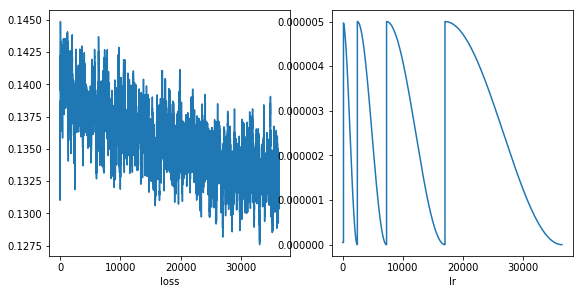

In [13]:
%%time
lr = 1e-5 / 2
lrs = np.array([lr/9, lr])
wd = 0.010
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-vegas', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-vegas')

In [13]:
learn.lr_find()
learn.sched.plot()

  0%|          | 0/362 [00:00<?, ?it/s]                      

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58